<a href="https://colab.research.google.com/github/lenaphamthi/bai_tap_thong_ke/blob/main/XSTK_KiemDinhPhiThamSo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#khai báo các thư viện cần thiết 
import scipy.stats as ss
import numpy as np
import statsmodels.stats as sm

In [6]:
data = np.random.uniform(size = 20)
ks_statistic, p_value = ss.kstest(data, "uniform")
print("p_value:",p_value)

p_value: 0.5446569355918546


In [5]:
#Kiểm định có phải là phân phối poisson
data = np.random.poisson(10, size = 30)
ks_statistic, p_value = ss.kstest(data, 'poisson', args=(10,0))
print("p_value:",p_value)

p_value: 0.598556492401434


In [7]:
# Kiểm định có phải là phân phối chuẩn
data = np.random.normal(size = 20)
ss.shapiro(data)

(0.9282125234603882, 0.1426498144865036)

Ví dụ 16:
Có ba nhà máy cùng sản xuất một loại sản phẩm, người ta tiến hành kểm tra sản phẩm
của ba nhà máy thu được số liệu sau:
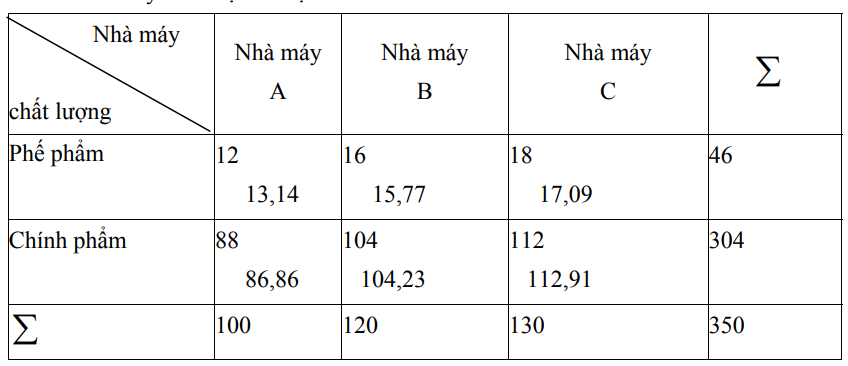

Với mức ý nghĩa 5% có thể cho rằng tỷ lệ phế phẩm của ba nhà máy là như nhau
hay không?

Xây dựng giả thuyết :
$$H_{0}: \text{Tỷ lệ phế phẩm của ba nhà máy là như nhau} $$
$$H_{a}: \text{Tồn tại ít nhất tỷ lệ phế phẩm của ba nhà máy là khác nhau}$$

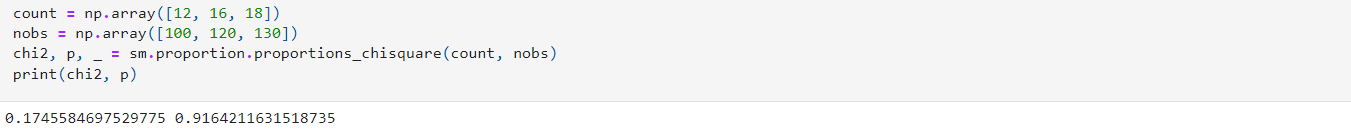

Không có bằng chứng để bác bỏ giả thuyết H0, như vậy tỷ lệ phế phẩm của ba nhà máy là như nhau 

Ví dụ 17:
Nghiên cứu tình trạng hôn nhân trước ngày cưới của 542 cặp vợ chồng ta có bảng
số liệu:
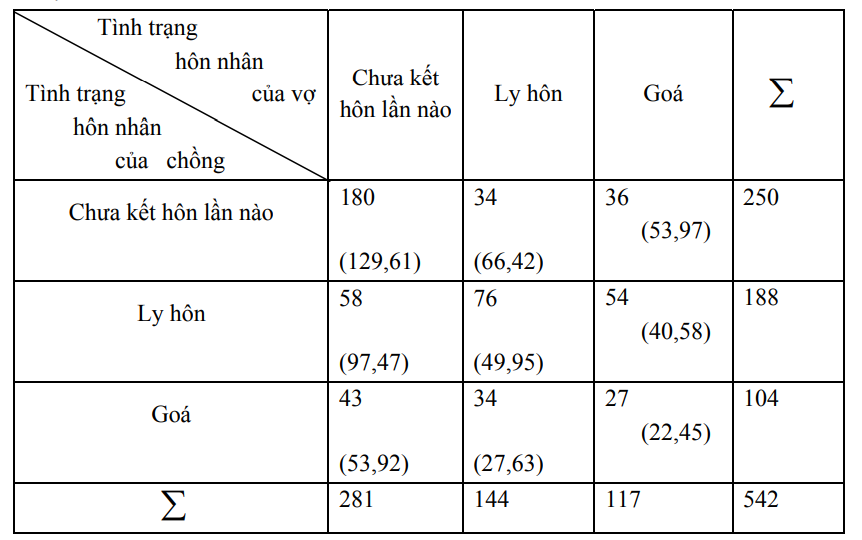

Với mức ý nghĩa 5% có thể cho rằng tình trạng hôn nhân của vợ và chồng là độc lập
với nhau hay không? 

Xây dựng giả thuyết :
$$H_{0}: \text{Tình trạng hôn nhân của vợ và chồng là độc lập nhau} $$
$$H_{a}: \text{Tồn tại ít nhất tình trạng hôn nhân của vợ và chồng không độc lập}$$

In [48]:
data = [[180, 34, 36], [58, 76, 54], [43, 34, 27]]
chi2, p, df, _ = ss.chi2_contingency(data)
print('p_value:',p)
if p < 0.05:
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Không có bằng chứng để bác bỏ giả thuyết H0")

p_value: 1.7402118708109908e-16
Có bằng chứng để bác bỏ giả thuyết H0
